In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [153]:
class vectors(object):
    
    def __init__(self, basis_vecs):
        self.coordinates = tuple([i for i in basis_vecs])
        
    def current_vectors(self):
        vecs = tuple(self.coordinates)
        for idx, vec in enumerate(vecs):
            print(f'Vector_{idx+1} coordinates are: {np.ravel(vec)}')
    
    def scalar_multiply(self, c):
        new_coords = tuple([c*x for x in self.coordinates])
        return new_coords
    
    def magnitude(self):
        coords_squared = tuple([x**2 for x in self.coordinates])
        mag = tuple([math.sqrt(sum(x)) for x in coords_squared])
        return mag
    
    def normalize(self):
        magn = self.magnitude()
        norm = tuple([1/x for x in magn])
        return norm
    
    def unit_vector(self):
        norm = tuple(self.normalize())
        unit_vector = [a*b for a,b in zip(norm, self.coordinates)]
        return unit_vector 
        
    def Angle_between_vectors(self):
        if len(self.coordinates) ==2:
            v1_m,v2_m = self.magnitude()
            v1,v2 = self.coordinates
            print(f'Vector1 magnitude: {round(v1_m,2)}')
            print(f'Vector2 magnitude: {round(v2_m,2)}')
            inner_product = np.dot(np.ravel(v1), np.ravel(v2))
            print(f'Inner product of vectors: {inner_product}')
            angle_rad = math.acos((inner_product/ (v1_m*v2_m)))
            degrees_per_radian = 180/math.pi
            solution = angle_rad* degrees_per_radian
            print(f'Angle between vector 1 & 2 is: {round(solution,2)}°')
    
        else:
            print('Method only works for two vector input')
       
    
vec1 = np.array([[-8],[1]])
vec2 = np.array([[-2],[7]])
inst = vectors([vec1,vec2])
print(inst.current_vectors())

Vector_1 coordinates are: [-8  1]
Vector_2 coordinates are: [-2  7]
None


In [222]:
inst.magnitude()

(2.23606797749979, 7.280109889280518)

In [155]:
inst.normalize()

(0.12403473458920847, 0.13736056394868904)

In [156]:
inst.unit_vector()

[array([[-0.99227788],
        [ 0.12403473]]), array([[-0.27472113],
        [ 0.96152395]])]

In [157]:
inst.Angle_between_vectors()

Vector1 magnitude: 8.06
Vector2 magnitude: 7.28
Inner product of vectors: 23
Angle between vector 1 & 2 is: 66.93°


# Inheritance

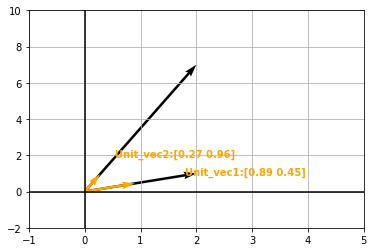

In [286]:
class graph(vectors):
    
    def __init__(self, basis_vecs):
        self.coordinates = tuple([i for i in basis_vecs])
        super().__init__(basis_vecs)
    
    def plot(self, magnitude=False, unit_vector=False):
        plt.figure()
        ax = plt.gca()
        vectors = tuple([x for x in self.coordinates])
        for v in vectors:
                ax.quiver(0,0, v[0], v[1], angles='xy',scale_units='xy',scale=1)
        x,y = zip(*vectors)
        ax.set_xlim([min(x)-3, max(x)+3])
        ax.set_ylim([min(y)-3,max(y)+3])
        
        
        if magnitude:
            mag = tuple(self.magnitude())
            vectors = tuple([x for x in self.coordinates])
            for idx, (v,m) in enumerate(zip(vectors,mag)):
                ax.text(v[0]*1.1, v[1]*1.1,
                        'Vector'+ str(idx+1)+ ': magnitude of ' +str(round(m,2)), color='blue')
       
        if unit_vector:
            norm = tuple(self.unit_vector())
            for idx,n in enumerate(norm):
                ax.quiver(0,0, n[0], n[1], angles='xy',scale_units='xy',scale=1, color='orange')
                ax.text(n[0]*2, n[1]*2,
                        'Unit_vec'+ str(idx+1)+ ':'+ str((np.ravel(n).round(2))), color='orange', weight='bold')
       
        if projection:

       
            
        plt.axvline(color='black')
        plt.axhline(color='black')
        plt.grid()
        plt.draw()
        plt.show()

vec1 = np.array([[2],[1]])
vec2 = np.array([[2],[7]])
inst = graph([vec1,vec2])
inst.plot(unit_vector=True)